In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import imutils


In [3]:
files = os.listdir("../../../Data/train/")

37582_left.jpeg


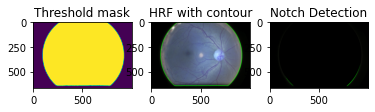

18647_right.jpeg


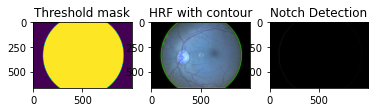

39575_left.jpeg


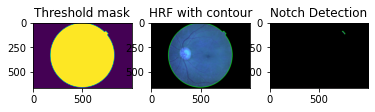

39628_left.jpeg


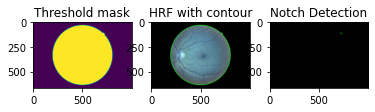

5825_right.jpeg


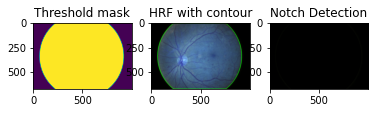

31995_left.jpeg


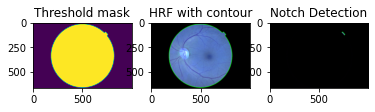

7017_left.jpeg


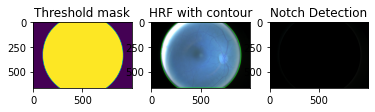

16289_left.jpeg


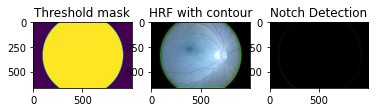

24301_right.jpeg


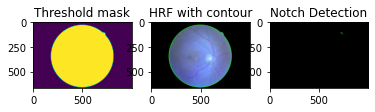

22334_right.jpeg


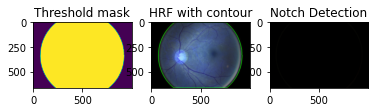

In [23]:
for i in files[:10]:
    im = cv.imread("/".join(("../../../Data/train/", i)))
    im_resize = imutils.resize(im, width=1000)
    
    #Convert to grey scale for thresholding
    imgrey = cv.cvtColor(im_resize, cv.COLOR_BGR2GRAY)
    # Outer area is very dark so can set threshold value very low
    ret, thresh = cv.threshold(imgrey, 25, 255,cv.THRESH_BINARY)

    # Use the mask to find contours
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    # Some images have many contours, this will extract the longest contour which should be the actual edge, not noise
    cnt = max(contours, key=len)
    M = cv.moments(cnt)
    # Calculate centroid of the HRF image
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    # Use the contour to get an area and an equivilent diameter
    area = cv.contourArea(cnt)
    
    # Due to clipping at the top and bottom of some images, equi diameter doesnt give a big enough mask
    # equi_diameter = np.sqrt(4*area/np.pi)
    
    # The diameter measured at the the y position of the centroid
    diameter = sum((thresh[cy]/2.1)>0)
    
    # Print out the image name and the 3 images below
    print(i)
    fig, axs = plt.subplots(1,3)

    # Plot the threshold, contour and the presence of the notch
    axs[0].set_title('Threshold mask')
    axs[0].imshow(thresh)
    
    axs[1].set_title('HRF with contour')
    axs[1].imshow(cv.drawContours(im_resize, [cnt], 0, (0,255,0), 3))

    axs[2].set_title('Notch Detection')
    cv.circle(im_resize, (cx, cy), int(diameter/1.97), (0,0,0),-1)
    axs[2].imshow(im_resize)
    


    plt.show()